## Aleatorização

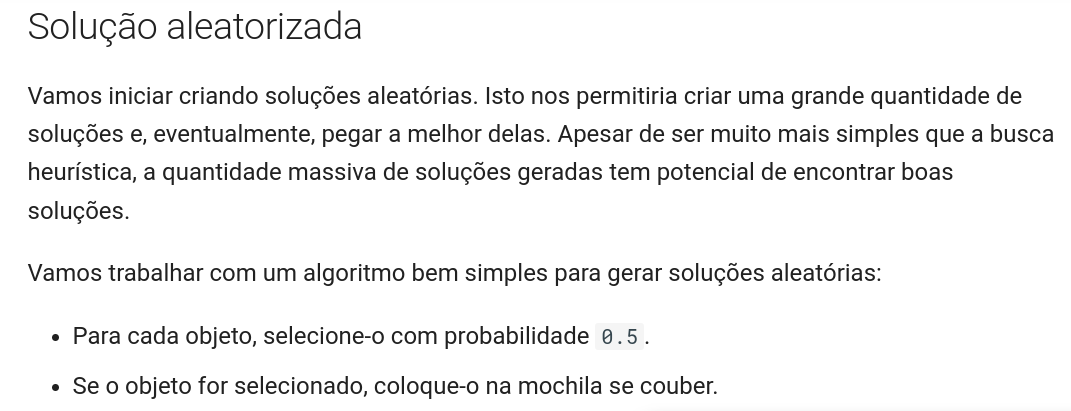

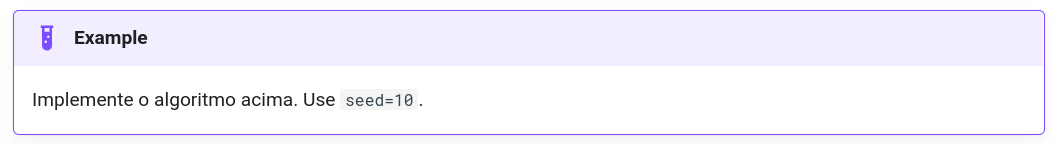

In [ ]:
%%writefile aleatorizado.cpp 

#include <iostream>
#include <vector>
#include <cmath>
#include<fstream>
#include <bits/stdc++.h>

using namespace std;

struct item{
    int id;
    double peso;
    double valor;
};


int main() {
    default_random_engine generator;
    generator.seed(10);

    int n = 0;
    int w = 0;
    uniform_real_distribution<double> distribution(0.0,1.0);
    vector<item> mochila;
    vector<item> items(n);

    cin >> n >> w; 

    double peso, valor;

    for(int i = 0 ; i<n; i++){
        cin >> peso;
        cin >> valor;
        items.push_back({i,peso,valor});
     }
     
     //sinvariante - elementos ordenado pelo valor (eh um ponto de certeza)
     sort(items.begin(),items.end(), [](auto& i, auto& j){return i.valor > j.valor;}); 
     
     peso = 0;
     valor = 0;
     int i = 1;
     for(auto& el: items){
            if (distribution(generator) > 0.5 && i<n){
                uniform_int_distribution<int> distribution(i,n-1);
                int p = distribution(generator);
                if (items[p].peso + peso <= w){
                    mochila.push_back(items[p]);
                    peso += items[p].peso;
                    valor += items[p].valor;
                    items.erase(items.begin()+p-1);
                    n=n-1;
                }
            }
            i=i+1;
     }

     for(auto& el: items){
                if (el.peso + peso <= w){
                    mochila.push_back(el);
                    peso = peso + el.peso;
                    valor = valor + el.valor;
                    // items.erase(items.begin()+p-1);
                }
     }


     //ordenando para imprimir
     sort(mochila.begin(),mochila.end(),[](auto&i, auto&j){return i.id < j.id;});
     cout << peso << " " << valor << " 0" << "\n";

     for (auto& el : mochila){
         cout << el.id << " ";
     }
    
    
    return 0;
}

// g++ -Wall -O3 ex1.cpp -o ex1

Overwriting aleatorizado.cpp


In [ ]:
!g++ -o aleatorizado aleatorizado.cpp

In [ ]:
!./aleatorizado < "in1.txt"

7 178 0
6 7 8 

## Busca Local

In [13]:
%%writefile buscaLocal.cpp 

#include<iostream>
#include<vector>
#include<algorithm>
#include <random>
using namespace std;

struct item {
    int id;
    int peso; // double
    int valor; // double
};

int main() {
  int n = 0;
  int W = 0;
  int melhor_valor = 0;
  int amostras = 40000;

  vector<item> mochila;
  vector<item> melhor_mochila;
  vector<item> items;

  cin >> n >> W;
  items.reserve(n);

  default_random_engine generator(100);
  uniform_real_distribution<double> distribution(0.0, 1.0);

  int peso = 0, valor = 0;
  for(int a = 0; a < n; a++) {
    cin >> peso;
    cin >> valor;
    items.push_back({a, peso, valor});
  }

  //aleatoriza o vetor
  random_shuffle(items.begin(), items.end());

  //cria solucoes aleatorias e faz busca local
  for(int c = 0; c < amostras; c++) {
    mochila.clear();
    vector<item> items2;
    items2.reserve(n);
    peso = 0;
    valor = 0;
    // milestone: criando a solucao aleatoria
    for(int i=0; i<n; i++) {
      if(distribution(generator) > 0.5) {
        if (items[i].peso + peso <= W) {
          mochila.push_back(items[i]);
          peso = peso + items[i].peso;
          valor = valor + items[i].valor;
        }
        else {
          items2.push_back(items[i]);
        }
      }
      else {
        items2.push_back(items[i]);
      }
    }
    // milestone: aqui ja tenho uma solucao gerada
    // agora preciso fazer a busca local
    for(auto& el: items2) {
      if(el.peso + peso <= W) {
        mochila.push_back(el);
        peso = peso + el.peso;
        valor = valor + el.valor;
      }
    }
    // milestone: encontramos (ou não) um vizinho melhor
    if(melhor_valor < valor) {
      melhor_valor = valor;
      melhor_mochila = mochila;
    }
  }
  // quero exibir a melhor mochila
  peso = 0;
  valor = 0;
  for (auto& el: melhor_mochila) {
    peso += el.peso;
    valor += el.valor;
  }
  cout << peso << " " << valor << " 0" << endl;
  sort(melhor_mochila.begin(), melhor_mochila.end(), [](auto& i, auto& j){return i.id < j.id;});
  for(auto& el: melhor_mochila) {
    cout << el.id << " ";
  }

  return 0;
}

Overwriting buscaLocal.cpp


In [14]:
!g++ -o buscaLocal buscaLocal.cpp

In [15]:
!./buscaLocal < "in1.txt"

8 241 0
1 5 7 